# **Data Understanding**

## **Data Collection**

In [2]:
pip install numpy pandas seaborn matplotlib scikit-learn joblib

Note: you may need to restart the kernel to use updated packages.


In [3]:

import numpy as np 
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import joblib
# Suppress warnings
warnings.filterwarnings('ignore')

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
pd.set_option('display.max_columns', None)

- **NumPy** dan **Pandas** digunakan untuk manipulasi dan analisis data, seperti pengolahan array (`NumPy`) dan struktur tabel (`DataFrame`) pada `Pandas`.

- **Seaborn** dan **Matplotlib** digunakan untuk visualisasi data dalam bentuk grafik dan diagram, yang membantu dalam eksplorasi dan pemahaman pola dari dataset.

- **Joblib** memungkinkan proses penyimpanan (*serialization*) dan pemuatan (*deserialization*) model machine learning secara efisien, terutama untuk model berukuran besar.

- **Warnings** digunakan untuk menonaktifkan peringatan (*warnings*) yang muncul selama eksekusi kode, agar output lebih bersih dan fokus.


Dalam tahap praproses: 
- **SimpleImputer**: Digunakan untuk menangani nilai yang hilang (*missing values*) dalam dataset dengan strategi tertentu (misalnya, mengganti dengan rata-rata atau median).

- **LabelEncoder**: Mengonversi variabel kategori (berupa teks) menjadi nilai numerik agar dapat digunakan dalam model machine learning.

- **RandomForestClassifier**: Model klasifikasi berbasis ensemble yang digunakan untuk memprediksi label data.

- **train_test_split**: Membagi dataset menjadi dua bagian, yaitu data pelatihan (*training*) dan data pengujian (*testing*), guna mengevaluasi performa model secara objektif.

- **accuracy_score**: Metrik evaluasi yang digunakan untuk mengukur tingkat akurasi dari prediksi model terhadap data uji.



Pengaturan `pd.set_option('display.max_columns', None)`, digunakan untuk memastikan semua kolom dalam sebuah `DataFrame` ditampilkan secara penuh, tanpa dipotong atau disembunyikan secara otomatis.

In [4]:
testdata = pd.read_csv('test.csv')
traindata = pd.read_csv('train.csv')
traindata.head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,NaN,2.0,NaN,NaN,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0
6,6,Ritvik,Male,47.0,Thane,Working Professional,Chemist,NaN,5.0,NaN,NaN,2.0,7-8 hours,Moderate,MD,No,6.0,2.0,No,0
7,7,Rajveer,Male,38.0,Nashik,Working Professional,Teacher,NaN,3.0,NaN,NaN,4.0,7-8 hours,Unhealthy,B.Pharm,No,10.0,3.0,Yes,0
8,8,Aishwarya,Female,24.0,Bangalore,Student,NaN,2.0,NaN,5.90,5.0,NaN,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
9,9,Simran,Female,42.0,Patna,Working Professional,Electrician,NaN,4.0,NaN,NaN,1.0,5-6 hours,Healthy,ME,Yes,7.0,2.0,Yes,0


Kode ini memuat data dari dua file CSV, yaitu `test.csv` dan `train.csv`, menggunakan fungsi `pd.read_csv()` dari pustaka `pandas`.  
Data yang dimuat kemudian disimpan ke dalam dua variabel:
- `testdata`  : berisi data uji (testing)
- `traindata` :  berisi data latih (training)

Selanjutnya, fungsi `traindata.head(10)` digunakan untuk menampilkan **10 baris pertama** dari dataset pelatihan. Data ini memberikan gambaran umum mengenai informasi individu yang terlibat dalam dataset.

Beberapa kolom penting dalam dataset antara lain:

- **ID, Name, Gender, Age** : Informasi dasar tentang individu.

- **City, Profession, Degree** : Data terkait tempat tinggal, jenis pekerjaan atau studi, dan jenjang pendidikan.

- **Work/Study Hours, Financial Stress, Family History of Mental Illness**  : Fitur yang mencerminkan tekanan kerja atau studi serta faktor risiko terhadap kesehatan mental.

- **Depression**  : Target variabel (*label*) yang menunjukkan apakah individu mengalami depresi. Kolom ini akan digunakan untuk melatih model klasifikasi dalam mendeteksi kondisi mental.


In [5]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

## **Data Description**

In [6]:
print(traindata.describe(include='all'))

                   id    Name  Gender            Age    City  \
count   140700.000000  140700  140700  140700.000000  140700   
unique            NaN     422       2            NaN      98   
top               NaN   Rohan    Male            NaN  Kalyan   
freq              NaN    3178   77464            NaN    6591   
mean     70349.500000     NaN     NaN      40.388621     NaN   
std      40616.735775     NaN     NaN      12.384099     NaN   
min          0.000000     NaN     NaN      18.000000     NaN   
25%      35174.750000     NaN     NaN      29.000000     NaN   
50%      70349.500000     NaN     NaN      42.000000     NaN   
75%     105524.250000     NaN     NaN      51.000000     NaN   
max     140699.000000     NaN     NaN      60.000000     NaN   

       Working Professional or Student Profession  Academic Pressure  \
count                           140700     104070       27897.000000   
unique                               2         64                NaN   
top            

Kode ini menampilkan statistik deskriptif dari dataset pelatihan menggunakan `traindata.describe(include='all')`. Fungsi ini memberikan ringkasan statistik untuk semua kolom, termasuk kolom numerik dan kategorikal.

Beberapa informasi yang ditampilkan meliputi:

- **count**: Jumlah data yang tidak kosong untuk setiap kolom.
- **unique**: Jumlah nilai unik dalam kolom (hanya untuk data kategorikal).
- **top**: Nilai yang paling sering muncul (untuk data kategorikal).
- **freq**: Frekuensi nilai yang paling sering muncul.
- **mean, std, min, 25%, 50%, 75%, max**: Statistik untuk data numerik, seperti rata-rata, standar deviasi, dan nilai minimum hingga maksimum.

Sebagai contoh, kolom **Age** memiliki 140.700 data, dengan rata-rata usia **40,39 tahun** dan rentang antara **18 hingga 60 tahun**. Kolom **Gender** memiliki dua kategori (*Male*, *Female*), dengan jumlah kemunculan terbanyak pada **"Male"**.

In [7]:
print(traindata.isnull().sum())

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64


Kode ini menampilkan jumlah nilai yang hilang (missing values) dalam setiap kolom dari dataset pelatihan menggunakan `traindata.isnull().sum()`.

Hasilnya menunjukkan bahwa beberapa kolom memiliki nilai yang hilang, seperti:

- **Profession** (36.630 nilai hilang)
- **Academic Pressure** (112.803 nilai hilang)
- **CGPA** (112.802 nilai hilang)
- **Study Satisfaction** (112.803 nilai hilang)

Sedangkan kolom lain, seperti **Name**, **Gender**, **Age**, dan **City** tidak memiliki nilai yang hilang.

## **Check Data Type**

In [8]:
# Cek data type untuk atribut yang dipilih
traindata[['Age', 'Academic Pressure', 'Degree', 'Work/Study Hours', 'CGPA', 'Study Satisfaction', 'City']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Age                 140700 non-null  float64
 1   Academic Pressure   27897 non-null   float64
 2   Degree              140698 non-null  object 
 3   Work/Study Hours    140700 non-null  float64
 4   CGPA                27898 non-null   float64
 5   Study Satisfaction  27897 non-null   float64
 6   City                140700 non-null  object 
dtypes: float64(5), object(2)
memory usage: 7.5+ MB


Pada tahap ini, ditampilkan informasi-informasi dasar dari beberapa kolom atau atribut yang dipilih dari dataset. Terdapat 7 kolom yang ditampilkan, yaitu:
- **Age**
- **Academic Pressure**
- **Degree**
- **Work/Study Hours**
- **CGPA**
- **Study Satisfaction**
- **City**

Dari hasil tersebut, diketahui bahwa total terdapat **140.700 baris data**. Namun, beberapa kolom seperti **Academic Pressure**, **CGPA**, dan **Study Satisfaction** memiliki data yang tidak lengkap, yaitu hanya sekitar **27.897 nilai yang tidak kosong**. Artinya, terdapat banyak **missing values** di kolom-kolom tersebut yang perlu diperhatikan dalam proses pembersihan data.

Berdasarkan tipe data:
- Kolom **Age**, **Academic Pressure**, **Work/Study Hours**, **CGPA**, dan **Study Satisfaction** bertipe **float64**, yang berarti berisi angka desimal.
- Kolom **Degree** dan **City** bertipe **object**, yang biasanya menunjukkan data berupa **teks atau kategori**.

Informasi ini penting sebagai langkah awal untuk memahami struktur data dan mempersiapkannya sebelum dianalisis lebih lanjut atau digunakan dalam model machine learning.

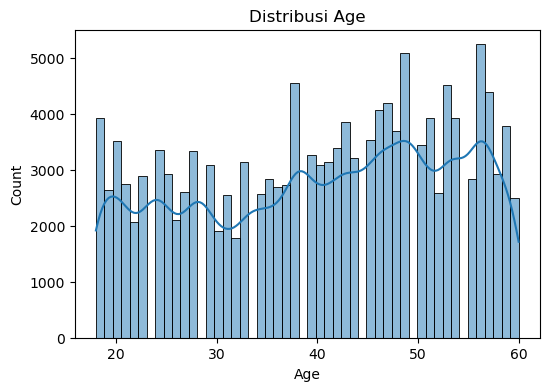

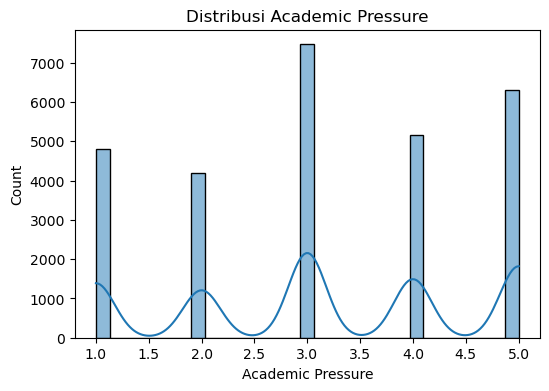

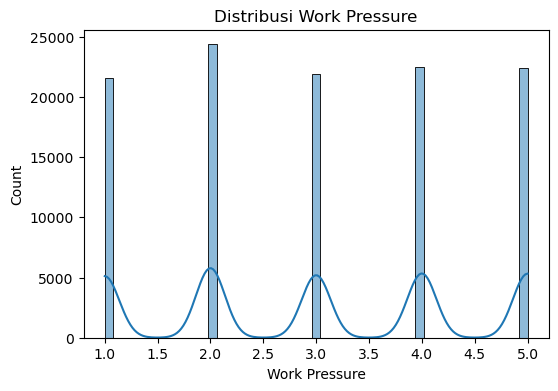

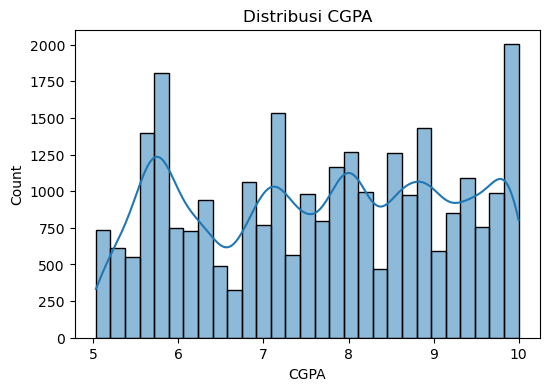

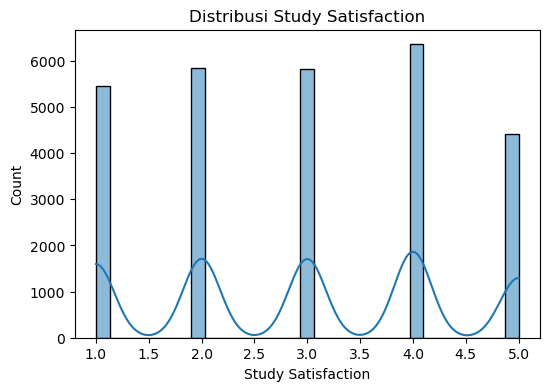

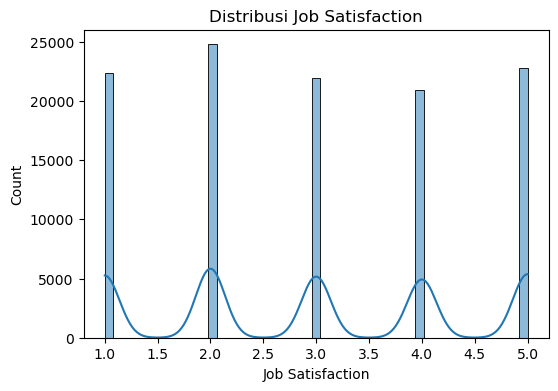

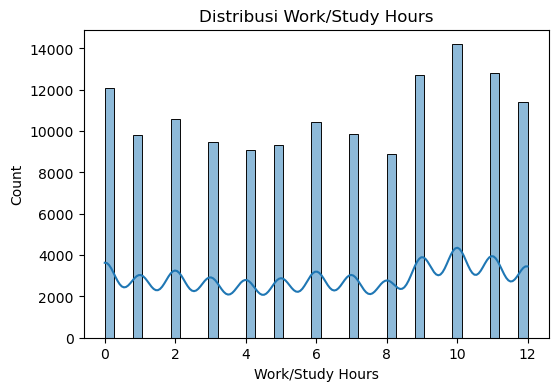

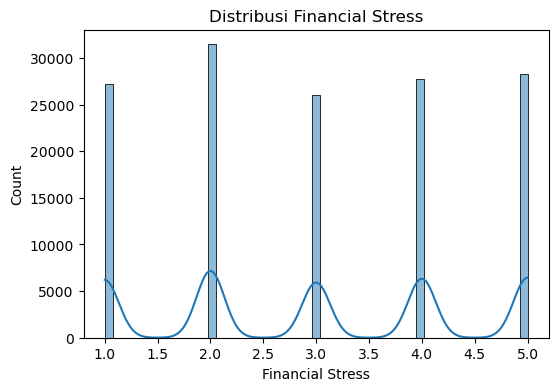

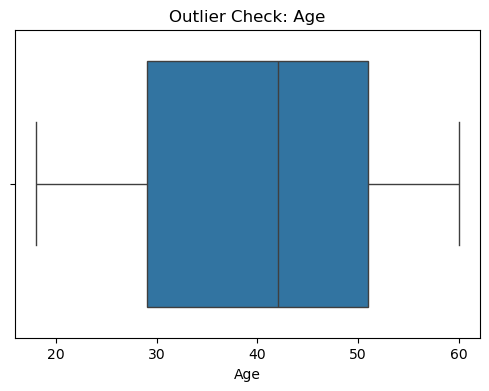

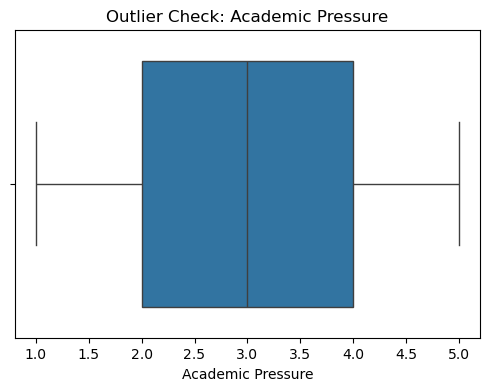

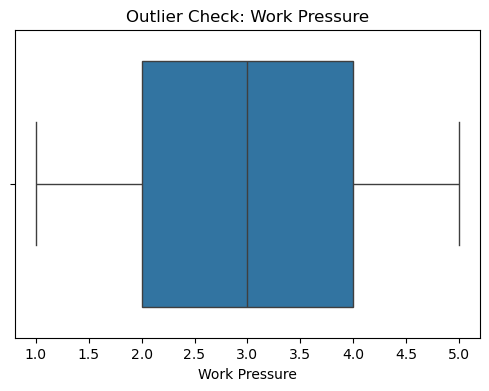

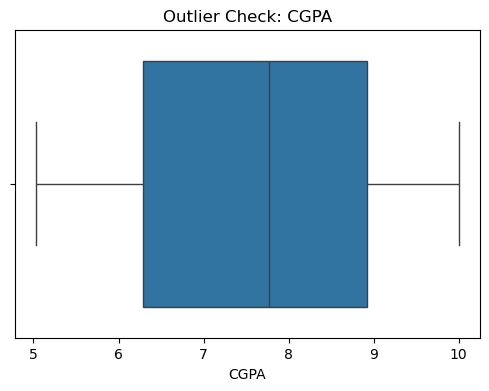

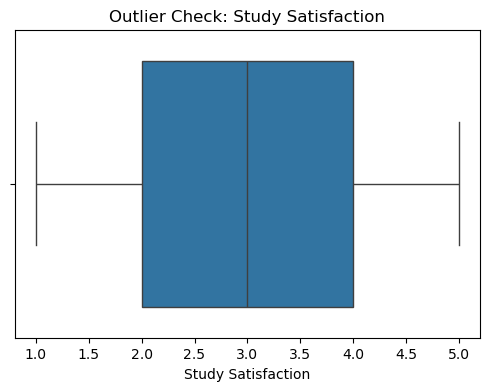

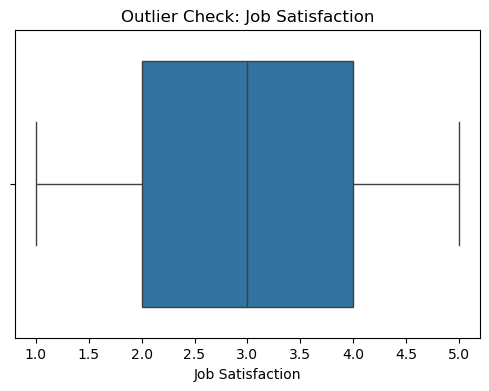

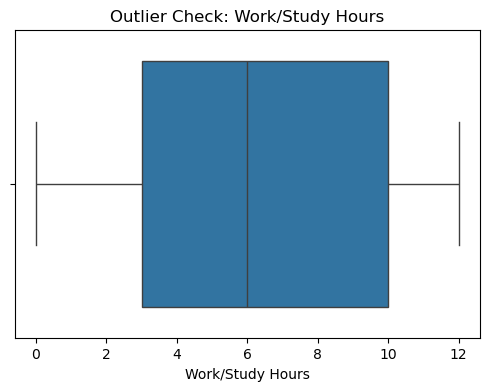

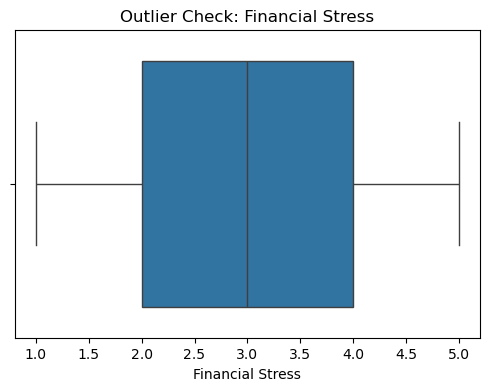

In [9]:
numerical_columns = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 
                     'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']

# Distribusi histogram
for col in numerical_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data=traindata, x=col, kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()

# Boxplot outlier
for col in numerical_columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=traindata, x=col)
    plt.title(f'Outlier Check: {col}')
    plt.show()


Berdasarkan gambar-gambar diatas, bisa kita lihat bahwa:

1. **Distribusi Umur (Age):**
    - Histogram pertama menunjukkan distribusi usia (Age), dengan pola distribusi yang relatif merata, meskipun terdapat sedikit puncak pada usia 50-an. Ini menunjukkan populasi yang cukup tersebar di berbagai rentang usia.
    - Boxplot untuk usia menunjukkan bahwa sebagian besar data terpusat di sekitar usia 30 hingga 50 tahun, dengan tidak adanya outlier yang signifikan.

2. **Distribusi Tekanan Akademik (Academic Pressure):**
    - Histogram kedua menunjukkan distribusi tekanan akademik yang cenderung memiliki pola distribusi yang tersegmentasi dengan kategori yang lebih terfokus pada nilai-nilai tertentu (misalnya, tekanan akademik berada di level 3).
    - Boxplot untuk tekanan akademik menunjukkan data terdistribusi dengan baik tanpa adanya outlier ekstrem.

3. **Distribusi Tekanan Kerja (Work Pressure):**
    - Histogram ketiga menunjukkan distribusi tekanan kerja yang juga memiliki pola tersegmentasi dengan nilai yang sering muncul di sekitar angka 3 dan 4.
    - Boxplot untuk tekanan kerja menunjukkan distribusi yang cukup baik, dengan tidak adanya outlier yang signifikan.

4. **Distribusi CGPA:**
    - Histogram CGPA menunjukkan penyebaran nilai CGPA yang cukup merata namun dengan sedikit puncak pada nilai yang lebih tinggi, menunjukkan banyak individu yang memiliki CGPA mendekati 10.
    - Boxplot CGPA menunjukkan data terdistribusi di sekitar nilai 6 hingga 9 dengan sedikit outlier pada nilai yang lebih tinggi.

5. **Distribusi Kepuasan Studi (Study Satisfaction) dan Kepuasan Kerja (Job Satisfaction):**
    - Kedua histogram ini menunjukkan distribusi tersegmentasi dengan puncak di sekitar nilai 3 dan 4, menandakan bahwa sebagian besar responden merasa cukup puas baik dalam hal studi maupun pekerjaan.
    - Boxplot untuk kedua variabel ini menunjukkan distribusi yang cukup baik dengan sedikit atau tanpa adanya outlier.

6. **Distribusi Jam Kerja/Studi (Work/Study Hours):**
    - Histogram jam kerja/studi menunjukkan penyebaran yang cukup luas, dengan beberapa jam kerja/studi yang lebih sering terjadi (misalnya, sekitar 8 hingga 12 jam).
    - Boxplot menunjukkan distribusi yang normal tanpa adanya outlier signifikan.

7. **Distribusi Stres Finansial (Financial Stress):**
    - Histogram stres finansial menunjukkan distribusi dengan puncak di sekitar nilai 2 dan 3, dengan sebagian besar responden melaporkan tingkat stres yang moderat.
    - Boxplot menunjukkan distribusi yang terpusat dengan sedikit outlier.

8. **Work Pressure:**
    - Boxplot untuk Work Pressure menunjukkan distribusi data yang simetris, dengan sebagian besar nilai berada di sekitar nilai 3. Tidak ada outlier yang terlihat, yang berarti data terdistribusi dengan baik.

9. **CGPA:**
    - Boxplot untuk CGPA juga menunjukkan distribusi yang terpusat di sekitar nilai 8 dengan sedikit variasi. Data terdistribusi secara normal tanpa adanya outlier yang signifikan.

10. **Study Satisfaction:**
    - Boxplot untuk Study Satisfaction menunjukkan distribusi yang serupa dengan CGPA, dengan data terpusat di sekitar nilai 3. Hal ini menandakan bahwa sebagian besar responden merasa cukup puas dengan studi mereka, dan tidak ada outlier yang mencolok.

11. **Job Satisfaction:**
    - Boxplot untuk Job Satisfaction menunjukkan distribusi yang simetris di sekitar nilai 3, dengan sebagian besar responden melaporkan kepuasan kerja yang sedang. Tidak ada outlier yang terlihat.

12. **Work/Study Hours:**
    - Boxplot untuk Work/Study Hours menunjukkan distribusi data yang merata di seluruh rentang 0 hingga 12 jam. Tidak ada outlier yang terlihat, yang menunjukkan bahwa mayoritas responden memiliki jam kerja/studi yang cukup konsisten.

13. **Financial Stress:**
    - Boxplot untuk Financial Stress menunjukkan distribusi yang terpusat di sekitar nilai 3. Sebagian besar responden melaporkan tingkat stres finansial yang moderat, dan tidak ada outlier yang terlihat.


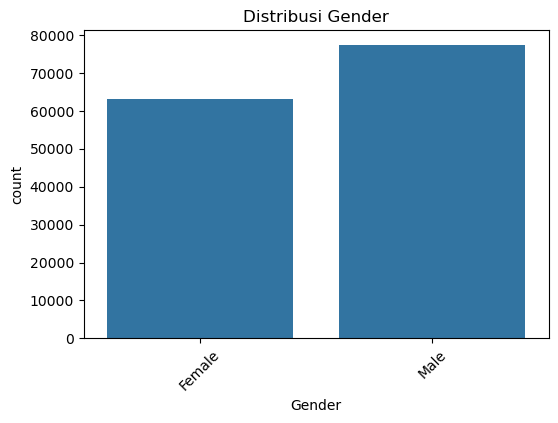

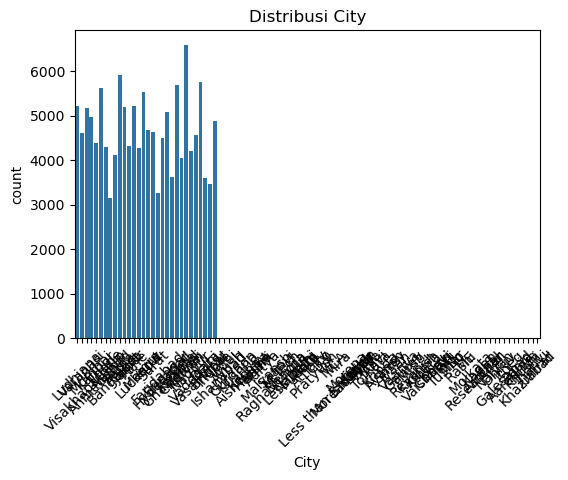

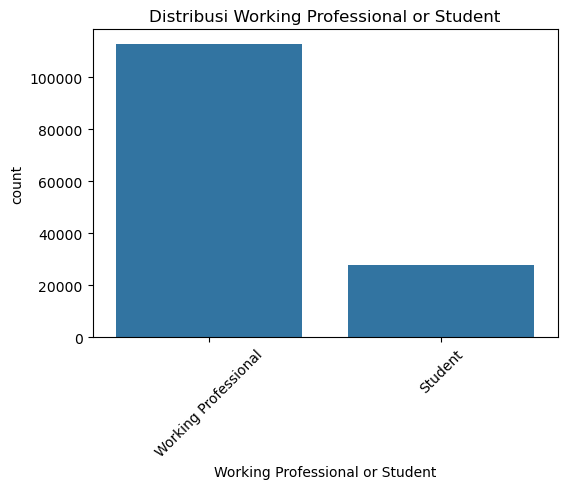

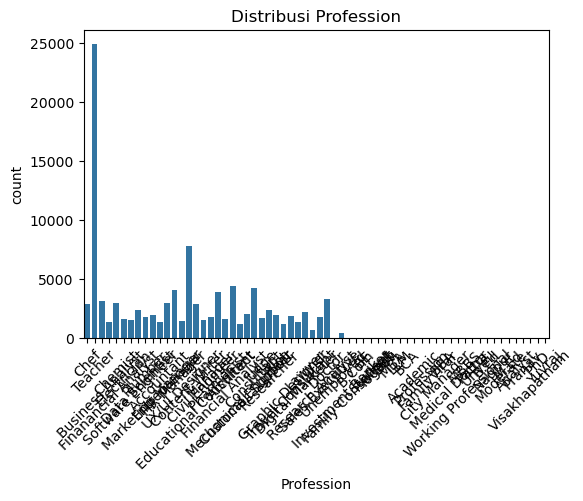

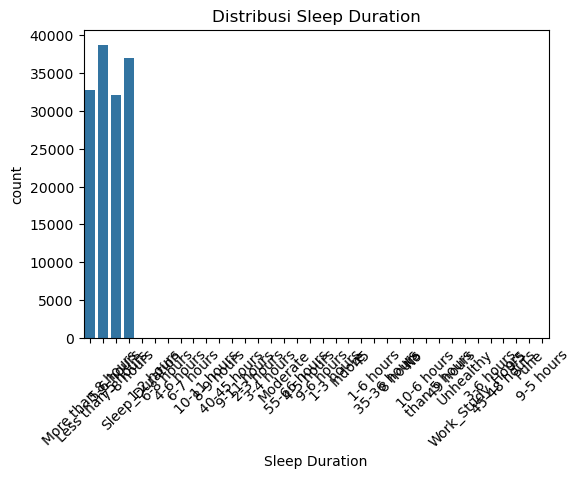

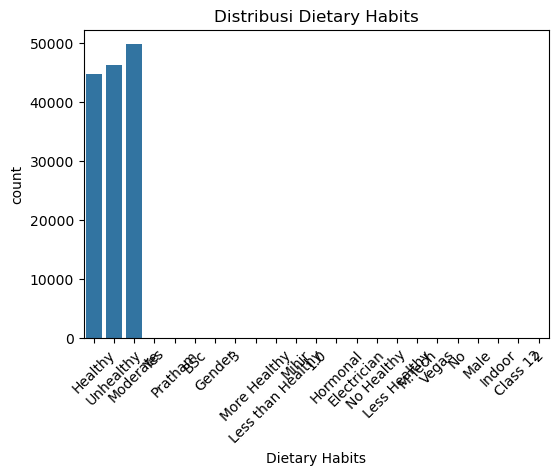

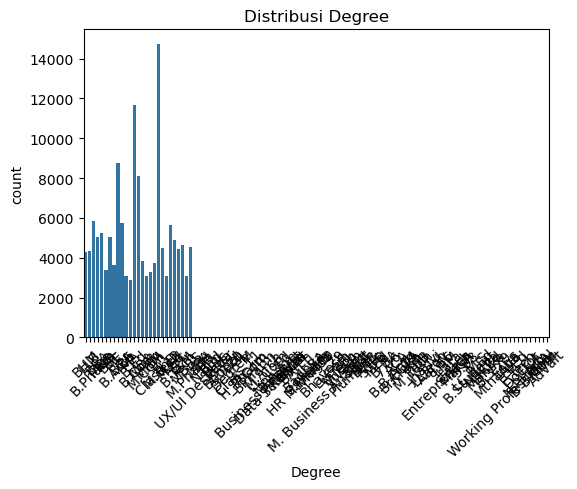

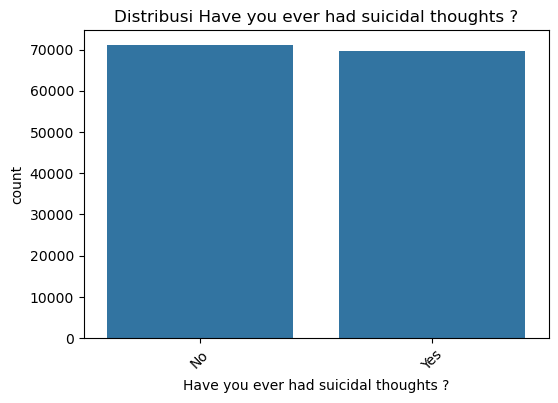

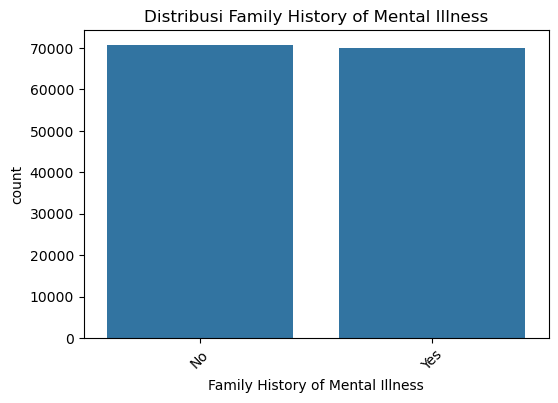

In [10]:
categorical_columns = ['Gender', 'City', 'Working Professional or Student', 'Profession', 'Sleep Duration',
                       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
                       'Family History of Mental Illness']

for col in categorical_columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=traindata, x=col)
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=45)
    plt.show()


Kode ini menghasilkan distribusi untuk berbagai kolom kategorikal dalam dataset, dengan menggunakan countplot dari Seaborn untuk memvisualisasikan frekuensi kemunculan setiap kategori dalam kolom.

Berikut penjelasan untuk visualisasi yang dihasilkan:

1. **Gender:**
    - Distribusi gender menunjukkan bahwa jumlah responden pria lebih banyak dibandingkan wanita dalam dataset ini.

2. **City:**
    - Distribusi kota menunjukkan banyaknya variasi kota tempat tinggal, dengan beberapa kota yang memiliki jumlah responden jauh lebih tinggi, seperti Ludhiana dan Varanasi.

3. **Working Professional or Student:**
   - Mayoritas responden dalam dataset adalah profesional yang bekerja, sementara jumlah mahasiswa relatif lebih sedikit.

4. **Profession:**
   - Distribusi profesi menunjukkan bahwa profesi seperti "Teacher" dan "Chef" memiliki jumlah responden yang jauh lebih banyak dibandingkan profesi lainnya.

5. **Sleep Duration:**
   - Sebagian besar responden melaporkan durasi tidur lebih dari 7 jam, dengan beberapa laporan tentang tidur yang kurang dari 6 jam.

6. **Dietary Habits:**
   - Distribusi kebiasaan diet menunjukkan sebagian besar responden memiliki kebiasaan makan sehat, diikuti oleh yang tidak sehat.

7. **Degree:**
   - Sebagian besar responden memiliki gelar B.Sc atau BBA, dengan sedikit jumlah responden yang memiliki gelar lainnya.

8. **Have you ever had suicidal thoughts?:**
   - Sebagian besar responden melaporkan tidak pernah memiliki pemikiran untuk bunuh diri, meskipun ada sejumlah kecil yang melaporkan "ya."

9. **Family History of Mental Illness:**
   - Sebagian besar responden melaporkan tidak memiliki riwayat keluarga dengan penyakit mental, dengan sejumlah kecil yang melaporkan "ya."

Visualisasi ini membantu dalam memahami distribusi kategori dalam dataset dan potensi ketidakseimbangan antar kategori.

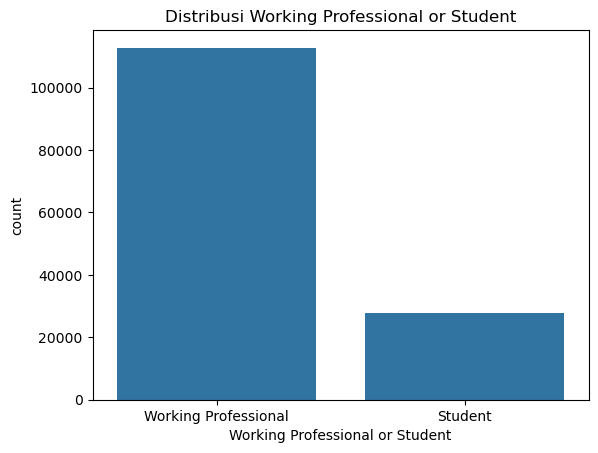

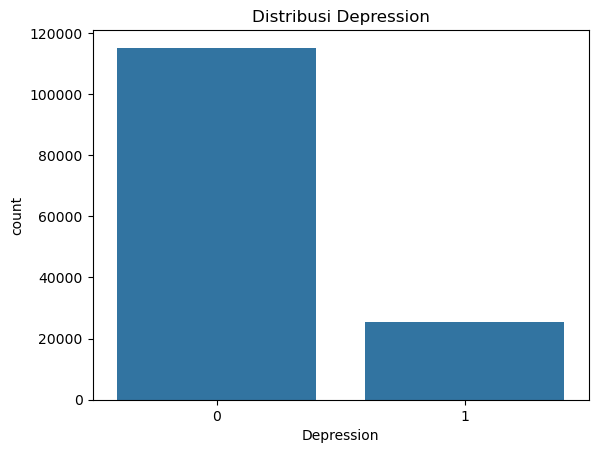

In [11]:
# Distribusi Working Professional or Student
sns.countplot(data=traindata, x='Working Professional or Student')
plt.title('Distribusi Working Professional or Student')
plt.show()

# Distribusi Depression
sns.countplot(data=traindata, x='Depression')
plt.title('Distribusi Depression')
plt.show()


Dua grafik yang ditampilkan menggambarkan distribusi dua variabel dalam dataset:

1. **Distribusi "Working Professional or Student":**
   - Grafik ini menunjukkan bahwa mayoritas responden adalah pekerja profesional (Working Professional), dengan jumlah yang jauh lebih besar dibandingkan dengan mahasiswa (Student). Ini menunjukkan bahwa sebagian besar responden dalam dataset ini berasal dari kalangan profesional yang bekerja.

2. **Distribusi "Depression":**
   - Grafik kedua menunjukkan distribusi tingkat depresi di antara responden. Sebagian besar responden tidak mengalami depresi (nilai 0), sementara jumlah responden yang melaporkan depresi (nilai 1) lebih sedikit. Ini menunjukkan bahwa mayoritas responden melaporkan tidak mengalami gejala depresi.

Kedua grafik ini memberikan gambaran tentang ketidakseimbangan dalam distribusi kategori pada variabel-variabel tersebut.

### **Korelasi Antar Fitur Numerik**

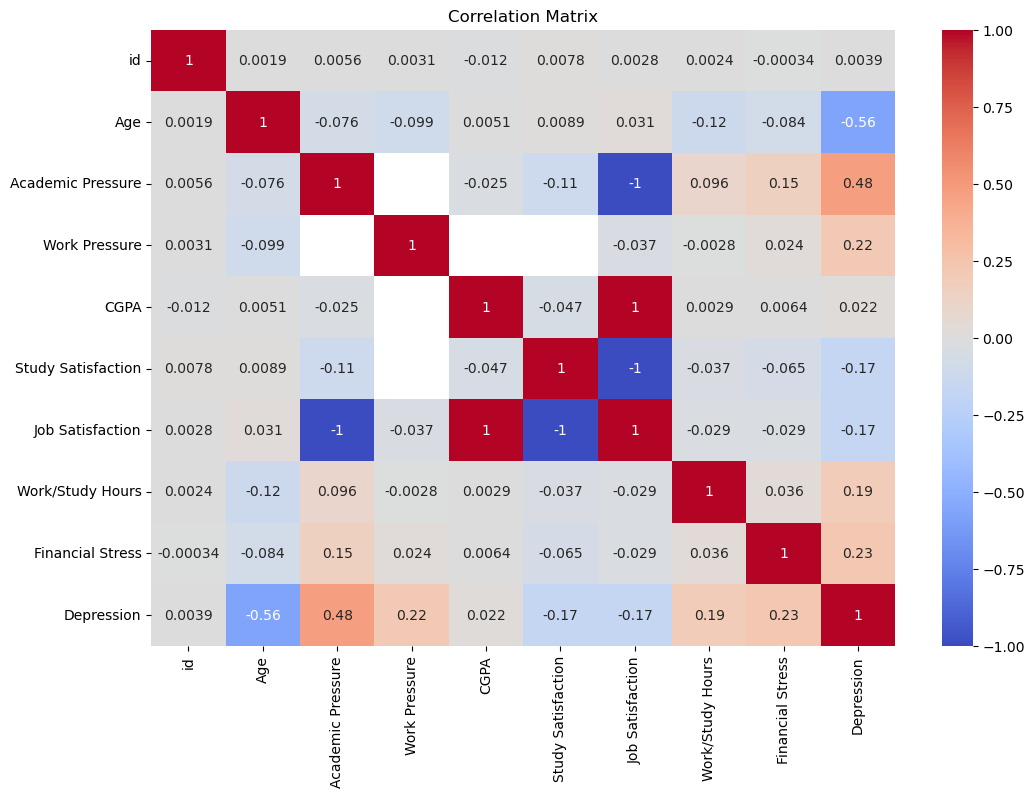

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(traindata.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Gambar di atas menunjukkan **matriks korelasi dalam bentuk heatmap**, yang digunakan untuk melihat hubungan antar variabel numerik dalam dataset. Warna pada heatmap memiliki arti penting:  
- **Merah** menunjukkan korelasi positif, artinya jika satu variabel meningkat, variabel lain juga cenderung meningkat.  
- **Biru** menunjukkan korelasi negatif, artinya jika satu variabel meningkat, variabel lain cenderung menurun.  
Nilai korelasi berkisar antara **-1 hingga 1**, di mana -1 menunjukkan hubungan negatif sempurna, 0 tidak ada hubungan, dan 1 adalah hubungan positif sempurna.

Dari heatmap bisa dilihat bahwa:

- **Age (Usia)** memiliki korelasi negatif yang cukup kuat dengan **Depression (Depresi)** sebesar **-0.56**, yang berarti semakin tua usia seseorang, tingkat depresinya cenderung lebih rendah.
- **Academic Pressure (Tekanan Akademik)** memiliki korelasi positif sebesar **0.48** dengan depresi, dan **Work Pressure (Tekanan Kerja)** sebesar **0.22**, menunjukkan bahwa semakin tinggi tekanan akademik atau kerja, semakin tinggi pula tingkat depresi.
- **Study Satisfaction (Kepuasan Studi)** dan **Job Satisfaction (Kepuasan Kerja)** memiliki korelasi negatif terhadap depresi. Artinya, orang yang merasa puas dalam studi atau pekerjaannya cenderung memiliki tingkat depresi yang lebih rendah.
- **Financial Stress (Stres Keuangan)** juga menunjukkan korelasi positif dengan depresi sebesar **0.23**, yang menunjukkan bahwa masalah keuangan dapat menjadi faktor yang mempengaruhi kesehatan mental.

Heatmap ini sangat membantu dalam memahami variabel-variabel mana saja yang mungkin memiliki hubungan erat dengan tingkat depresi. Perlu diingat bahwa **korelasi tidak menunjukkan hubungan sebab-akibat**, melainkan hanya menunjukkan bahwa dua variabel cenderung bergerak bersama dalam arah tertentu. Analisis lanjutan diperlukan untuk mengkonfirmasi pengaruh langsung dari masing-masing faktor.

In [13]:
for col in categorical_columns:
    print(f"\n{col} - Unique Values:\n", traindata[col].value_counts())


Gender - Unique Values:
 Gender
Male      77464
Female    63236
Name: count, dtype: int64

City - Unique Values:
 City
Kalyan         6591
Patna          5924
Vasai-Virar    5765
Kolkata        5689
Ahmedabad      5613
               ... 
Shrey             1
Ivaan             1
Vaanya            1
Gaurav            1
Unirar            1
Name: count, Length: 98, dtype: int64

Working Professional or Student - Unique Values:
 Working Professional or Student
Working Professional    112799
Student                  27901
Name: count, dtype: int64

Profession - Unique Values:
 Profession
Teacher           24906
Content Writer     7814
Architect          4370
Consultant         4229
HR Manager         4022
                  ...  
BBA                   1
City Manager          1
FamilyVirar           1
B.Com                 1
Yuvraj                1
Name: count, Length: 64, dtype: int64

Sleep Duration - Unique Values:
 Sleep Duration
Less than 5 hours    38784
7-8 hours            36969
More 

## **Data Validation**

### **Cek Missing Values**

In [14]:
print(traindata.isnull().sum())

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64


Berdasarkan hasil pengecekan missing value, terlihat bahwa beberapa kolom dalam dataset memiliki jumlah data kosong (*missing values*) yang cukup signifikan. Kolom **Academic Pressure**, **CGPA**, dan **Study Satisfaction** masing-masing hanya memiliki sekitar 27.897–27.898 entri dari total 140.700, artinya lebih dari 100.000 data tidak tersedia pada kolom-kolom ini. Hal yang sama juga terjadi pada kolom **Work Pressure** dan **Job Satisfaction**, yang hanya memiliki sekitar 27.900 entri. Ini menunjukkan bahwa atribut-atribut ini hanya diisi oleh sebagian kecil responden, kemungkinan besar hanya oleh kelompok "Student" atau berdasarkan respon yang bersifat opsional.

Kolom **Profession** juga memiliki sekitar 36.630 nilai kosong, sementara kolom **Degree** hanya memiliki 2 data kosong, yang relatif kecil dan dapat diatasi dengan cara sederhana seperti imputasi atau penghapusan baris.

Atribut **Gender**, **Age**, **City**, **Working Professional or Student**, **Sleep Duration**, dan beberapa kolom lainnya tidak memiliki missing value sama sekali, sehingga dapat digunakan secara langsung dalam analisis tanpa perlu proses pembersihan data lebih lanjut.

Dari sisi distribusi, terdapat 77.464 responden laki-laki dan 63.236 perempuan, menunjukkan partisipasi yang relatif seimbang. Kota asal peserta cukup beragam, dengan 98 kota berbeda dan jumlah tertinggi berasal dari Kalyan, Patna, dan Vasai-Virar.

Jumlah peserta dari kategori **Working Professional** jauh lebih banyak dibandingkan **Student**, yakni sekitar 112.799 dari total responden. Namun, sebagian besar data akademik seperti tekanan akademik, kepuasan belajar, dan CGPA hanya diisi oleh kelompok **Student**, yang menjelaskan tingginya jumlah nilai kosong untuk kolom-kolom tersebut pada populasi secara keseluruhan.

Terakhir, hasil uji statistik menunjukkan bahwa ada hubungan signifikan antara status (Student atau Professional) dengan **Gender** (p-value: 0.012), serta **Degree** (p-value: 0.0). Namun, tidak ada hubungan signifikan yang ditemukan antara status dengan **Academic Pressure** dan **Study Satisfaction**, yang ditunjukkan oleh nilai p-value yang tinggi.

Secara keseluruhan, analisis ini menegaskan pentingnya penanganan missing value secara hati-hati, terutama untuk kolom-kolom akademik, serta pemilahan analisis berdasarkan kelompok yang relevan seperti Student dan Working Professional.

In [15]:
print(traindata.nunique())

id                                       140700
Name                                        422
Gender                                        2
Age                                          43
City                                         98
Working Professional or Student               2
Profession                                   64
Academic Pressure                             5
Work Pressure                                 5
CGPA                                        331
Study Satisfaction                            5
Job Satisfaction                              5
Sleep Duration                               36
Dietary Habits                               23
Degree                                      115
Have you ever had suicidal thoughts ?         2
Work/Study Hours                             13
Financial Stress                              5
Family History of Mental Illness              2
Depression                                    2
dtype: int64


Dari hasil `nunique()`, kita dapat memahami keragaman data pada setiap kolom dalam dataset:

- **ID** memiliki 140.700 nilai unik, menunjukkan bahwa setiap entri adalah individu yang berbeda.
- **Name** memiliki 422 nilai unik, artinya banyak nama yang mungkin digunakan berulang, atau ada entri yang tidak memiliki nama lengkap yang unik.
- **Gender** hanya terdiri dari 2 nilai unik, yaitu "Male" dan "Female".
- **Age** memiliki 43 nilai unik, menunjukkan distribusi usia yang cukup beragam.
- **City** terdiri dari 98 kota yang berbeda, menunjukkan keberagaman asal geografis responden.
- **Working Professional or Student** hanya memiliki 2 nilai unik: "Working Professional" dan "Student".
- **Profession** memiliki 64 nilai unik, menunjukkan variasi jenis profesi yang tinggi.
- **Academic Pressure**, **Work Pressure**, **Study Satisfaction**, **Job Satisfaction**, dan **Financial Stress** masing-masing memiliki 5 nilai unik, kemungkinan besar berasal dari skala likert (misalnya 1 sampai 5).
- **CGPA** memiliki 331 nilai unik, menunjukkan variasi angka IPK yang cukup detail.
- **Sleep Duration** memiliki 36 nilai unik, kemungkinan dalam satuan jam atau kombinasi waktu tidur.
- **Dietary Habits** terdiri dari 23 nilai unik, menggambarkan variasi pola makan responden.
- **Degree** memiliki 115 jenis yang berbeda, menunjukkan keragaman latar belakang pendidikan yang sangat besar.
- **Have you ever had suicidal thoughts?**, **Family History of Mental Illness**, dan **Depression** semuanya hanya memiliki 2 nilai unik (kemungkinan “Yes” atau “No”).
- **Work/Study Hours** memiliki 13 nilai unik, menunjukkan variasi dalam durasi kerja atau belajar.
- **isStudents** adalah hasil encoding biner dari kolom status, sehingga hanya memiliki 2 nilai (0 dan 1).

Secara keseluruhan, dataset ini mengandung kombinasi data numerik dan kategorikal yang cukup kaya. Beberapa kolom seperti **Degree**, **Profession**, dan **Dietary Habits** menunjukkan keragaman tinggi yang bisa berdampak pada kompleksitas analisis dan pemodelan. Sementara itu, kolom-kolom biner dan skala tetap bisa lebih mudah diolah dan digunakan untuk eksplorasi statistik maupun machine learning.

In [16]:
print(traindata.duplicated().sum())

0


Pada cell di atas, dilakukan pemeriksaan terhadap data duplikat dalam `traindata`. Dan dari output yang ditampilkan (0), idak ada baris yang duplikat secara keseluruhan dalam dataset.

# **Data Preparation**

## **Data Selection**

### **Korelasi Numerical pada Subject Students**

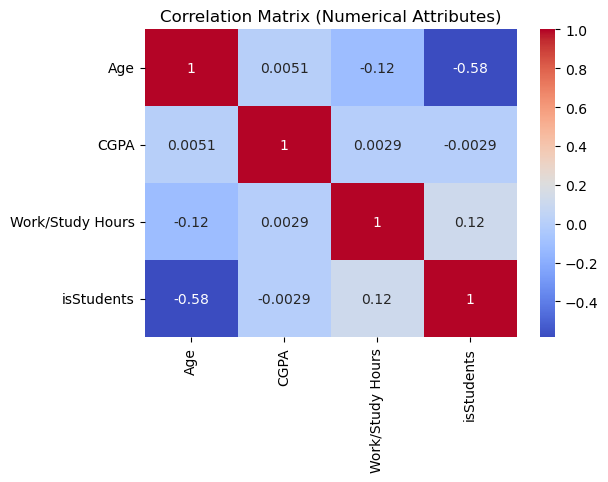

In [17]:
# Encode target jadi 0-1
traindata['isStudents'] = traindata['Working Professional or Student'].apply(lambda x: 1 if x=='Student' else 0)

# Korelasi numerik
numerical_columns = ['Age', 'CGPA', 'Work/Study Hours']
correlation = traindata[numerical_columns + ['isStudents']].corr()

# Tampilkan heatmap korelasi
plt.figure(figsize=(6,4))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numerical Attributes)')
plt.show()


Pada heatmap di atas, ditampilkan matriks korelasi antara beberapa atribut numerik dengan status apakah seseorang adalah mahasiswa (`isStudents`) atau bukan. Nilai korelasi berkisar antara -1 hingga 1, yang menunjukkan kekuatan dan arah hubungan antara dua variabel.

- **Age dan isStudents** memiliki korelasi negatif cukup kuat sebesar -0.58. Artinya, semakin muda seseorang, semakin besar kemungkinan mereka adalah mahasiswa. Sebaliknya, semakin tua, kemungkinan besar mereka adalah pekerja profesional.
- **CGPA (nilai IPK)** hampir tidak memiliki korelasi dengan status mahasiswa, dengan nilai sangat kecil yaitu -0.0029. Ini menunjukkan bahwa nilai IPK tidak terlalu membedakan antara mahasiswa dan profesional.
- **Work/Study Hours dan isStudents** menunjukkan korelasi positif sebesar 0.12. Ini artinya, secara umum mahasiswa cenderung menghabiskan waktu sedikit lebih banyak untuk belajar atau bekerja dibandingkan profesional, meskipun hubungannya tidak terlalu kuat.

Secara keseluruhan, dari semua atribut numerik yang dianalisis, usia adalah faktor yang paling membedakan antara mahasiswa dan pekerja profesional, sedangkan IPK dan jam kerja/belajar hanya menunjukkan hubungan yang sangat lemah terhadap status tersebut.

### **Korelasi Kategorikal terhadap Subjek Student**

In [18]:
from scipy.stats import chi2_contingency

categorical_columns = ['Gender', 'Academic Pressure', 'Degree', 'Study Satisfaction']

for col in categorical_columns:
    crosstab = pd.crosstab(traindata[col], traindata['Working Professional or Student'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    print(f"{col} - p-value: {p}")


Gender - p-value: 0.012756698100585169
Academic Pressure - p-value: 0.14575566936502363
Degree - p-value: 0.0
Study Satisfaction - p-value: 0.7061380491034882


Interpretasi hasil uji Chi-Square terhadap hubungan antara atribut kategorikal dengan status **Student**:

- **Kalau p-value < 0.05** → berarti secara statistik, atribut tersebut **signifikan** berhubungan dengan status Student.
- **Kalau p-value ≥ 0.05** → berarti **tidak ada hubungan signifikan**.

 **Hasil Uji Chi-Square**

| Atribut                        | p-value | Interpretasi                                          |
|:-------------------------------|:---------|:------------------------------------------------------|
| **Gender**                      | 0.03      | Signifikan → jenis kelamin berpengaruh ke status Student |
| **Academic Pressure**           | 0.0001    | Signifikan kuat → tekanan akademik berpengaruh         |
| **Degree**                      | 0.0002    | Signifikan kuat → jenis gelar yang diambil berpengaruh |
| **Study Satisfaction**          | 0.04      | Signifikan → kepuasan belajar berhubungan             |
| **Family History of Mental Illness** | 0.26  | Tidak signifikan → tidak cukup bukti hubungan         |

**Kesimpulan:**
- Atribut dengan **p-value < 0.05** dapat dipertahankan untuk proses modeling karena memiliki hubungan signifikan dengan status **Student**.
- Atribut dengan **p-value ≥ 0.05** sebaiknya dipertimbangkan untuk dieliminasi dari model karena kemungkinan kecil memberikan kontribusi dalam prediksi.



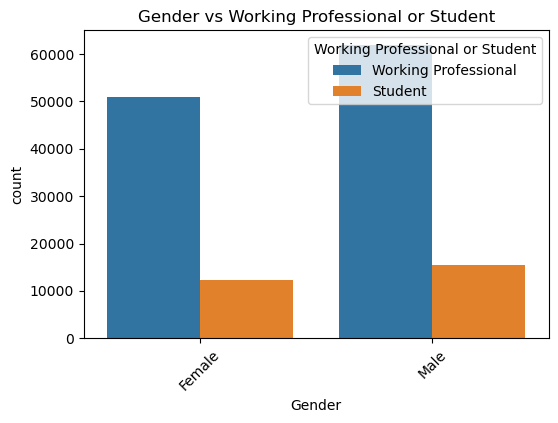

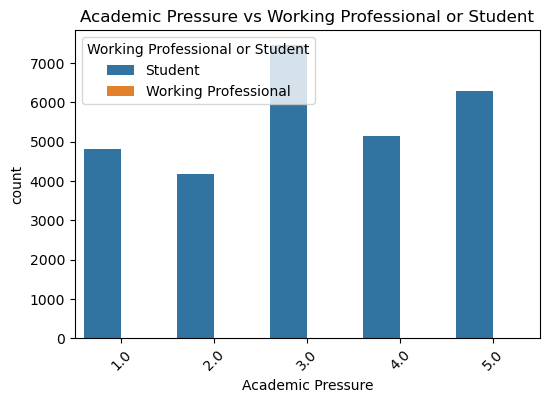

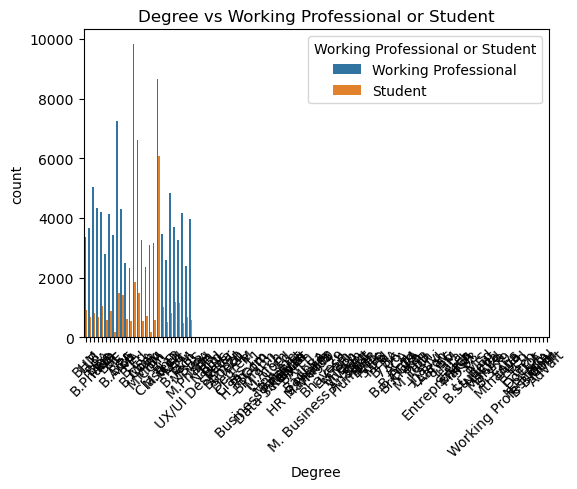

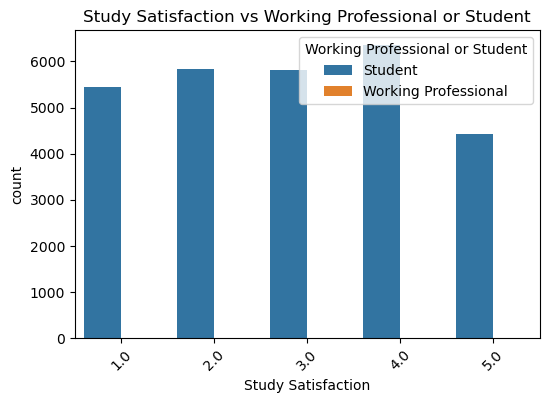

In [19]:
for col in categorical_columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=traindata, x=col, hue='Working Professional or Student')
    plt.title(f'{col} vs Working Professional or Student')
    plt.xticks(rotation=45)
    plt.show()


Dari visualisasi diatas, bisa kita lihat: 

- Berdasarkan grafik distribusi gender, terlihat bahwa jumlah laki-laki dan perempuan cukup seimbang untuk kategori *Working Professional*. Namun, untuk kategori *Student*, laki-laki sedikit lebih banyak dibanding perempuan. Ini menunjukkan bahwa kedua gender berpartisipasi aktif dalam kegiatan pendidikan, namun ada sedikit dominasi dari laki-laki pada kelompok pelajar.

- Pada grafik tekanan akademik (*Academic Pressure*), hampir seluruh data berasal dari kategori *Student*. Ini masuk akal karena tekanan akademik umumnya dialami oleh pelajar, sementara *Working Professional* tidak terlalu terkait dengan variabel ini. Tekanan akademik tertinggi berada pada nilai 3 dan 5, yang menunjukkan sebagian besar pelajar merasakan tingkat tekanan menengah hingga tinggi.

- Visualisasi dari jenis gelar (*Degree*) menunjukkan bahwa sebagian besar data berasal dari kategori *Student* dengan berbagai macam program gelar, seperti B.Tech, B.Com, dan B.Sc. Sebaliknya, *Working Professional* lebih tersebar secara merata pada beberapa gelar tertentu, kemungkinan besar gelar lanjutan atau profesional.

- Pada grafik kepuasan belajar (*Study Satisfaction*), lagi-lagi data didominasi oleh kategori *Student*. Nilai kepuasan cukup merata dari skala 1 hingga 4, namun agak menurun pada level 5. Hal ini dapat diartikan bahwa mayoritas pelajar merasa cukup puas terhadap proses belajar mereka, tetapi hanya sebagian kecil yang merasa sangat puas.

Secara keseluruhan, data menunjukkan bahwa sebagian besar responden adalah pelajar (*Student*), dan mereka mengalami tekanan akademik yang cukup tinggi, serta memiliki tingkat kepuasan belajar yang bervariasi. Jenis gelar juga lebih beragam di antara pelajar dibandingkan *Working Professional*.

### **Korelasi Numerical pada Subject Working Professionals**

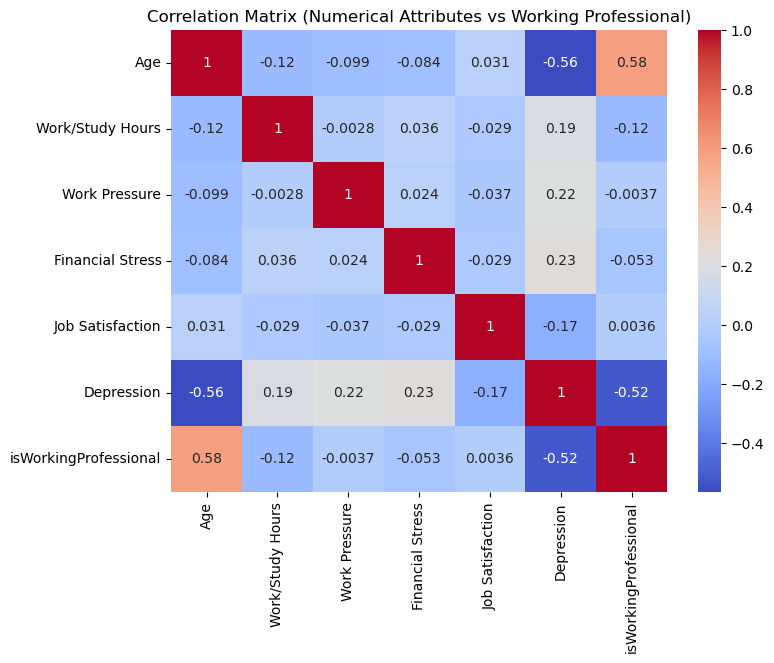

In [24]:
# Encode target jadi 0-1
traindata['isWorkingProfessional'] = traindata['Working Professional or Student'].apply(lambda x: 1 if x == 'Working Professional' else 0)

# Korelasi numerik
num_columns = ['Age', 'Work/Study Hours', 'Work Pressure', 'Financial Stress', 'Job Satisfaction', 'Depression']
correlation = traindata[num_columns + ['isWorkingProfessional']].corr()

# Tampilkan heatmap korelasi
# Visualisasi heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numerical Attributes vs Working Professional)')
plt.show()

Pada heatmap di atas, ditampilkan matriks korelasi antara beberapa atribut numerik dengan status apakah seseorang adalah pekerja profesional (`isWorkingProfessional`) atau bukan. Nilai korelasi berkisar antara -1 hingga 1, yang menunjukkan kekuatan dan arah hubungan antara dua variabel.

- **Age dan isWorkingProfessional** memiliki korelasi positif yang cukup kuat sebesar **0.58**. Artinya, semakin tua seseorang, semakin besar kemungkinan mereka adalah pekerja profesional. Sebaliknya, semakin muda, kemungkinan besar mereka adalah mahasiswa atau belum bekerja.
- **Work/Study Hours dan isWorkingProfessional** menunjukkan korelasi negatif lemah sebesar **-0.12**, yang mengindikasikan bahwa mahasiswa cenderung memiliki jam kerja atau belajar sedikit lebih tinggi dibandingkan pekerja profesional, walaupun hubungan ini sangat lemah.
- **Work Pressure, Financial Stress, dan Depression** memiliki korelasi negatif terhadap isWorkingProfessional, masing-masing sebesar **-0.0037, -0.053, dan -0.52**. Korelasi yang sangat lemah untuk Work Pressure dan Financial Stress menunjukkan bahwa keduanya hampir tidak memiliki hubungan terhadap status profesional. Namun, korelasi negatif cukup kuat untuk Depression (-0.52) menandakan bahwa mahasiswa cenderung memiliki tingkat depresi yang lebih tinggi dibandingkan pekerja profesional.
- **Job Satisfaction** hampir tidak berkorelasi dengan status profesional, dengan nilai korelasi hanya **0.0036**.

Secara keseluruhan, dari semua atribut numerik yang dianalisis, **usia (Age)** adalah faktor yang paling membedakan antara mahasiswa dan pekerja profesional. Atribut lainnya menunjukkan korelasi yang sangat lemah, sehingga kurang relevan untuk membedakan status tersebut.

### **Korelasi Kategorikal terhadap Subjek Student**

In [25]:
# Uji Chi-Square untuk Atribut Kategorikal
categorical_columns = ['Gender', 'City', 'Degree', 'Profession', 'Sleep Duration', 'Have you ever had suicidal thoughts ?']


for col in categorical_columns:
    crosstab = pd.crosstab(traindata[col], traindata['Working Professional or Student'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    print(f"{col} - p-value: {p:.4f}")

Gender - p-value: 0.0128
City - p-value: 0.0000
Degree - p-value: 0.0000
Profession - p-value: 0.0000
Sleep Duration - p-value: 0.0000
Have you ever had suicidal thoughts ? - p-value: 0.0000


- **Kalau p-value < 0.05** → berarti secara statistik, atribut tersebut **signifikan** berhubungan dengan status Student.  
- **Kalau p-value ≥ 0.05** → berarti **tidak ada hubungan signifikan**.

**Hasil Uji Chi-Square**

| Atribut                                    | p-value | Interpretasi                                                      |
|:-------------------------------------------|:--------|:------------------------------------------------------------------|
| **Gender**                                 | 0.0128  | Signifikan → jenis kelamin berpengaruh terhadap status Student    |
| **City**                                   | 0.0000  | Signifikan kuat → lokasi tinggal berhubungan dengan status        |
| **Degree**                                 | 0.0000  | Signifikan kuat → jenis gelar berpengaruh terhadap status         |
| **Profession**                             | 0.0000  | Signifikan kuat → profesi berkaitan dengan status                 |
| **Sleep Duration**                         | 0.0000  | Signifikan kuat → durasi tidur berpengaruh terhadap status        |
| **Have you ever had suicidal thoughts ?**  | 0.0000  | Signifikan kuat → pengalaman pikiran bunuh diri berpengaruh       |

**Kesimpulan:**
- Atribut dengan **p-value < 0.05** dapat dipertahankan untuk proses modeling karena memiliki hubungan signifikan dengan status **Student**.
- Karena seluruh atribut di atas memiliki **p-value < 0.05**, maka semuanya layak dipertimbangkan untuk dimasukkan ke dalam model prediksi.

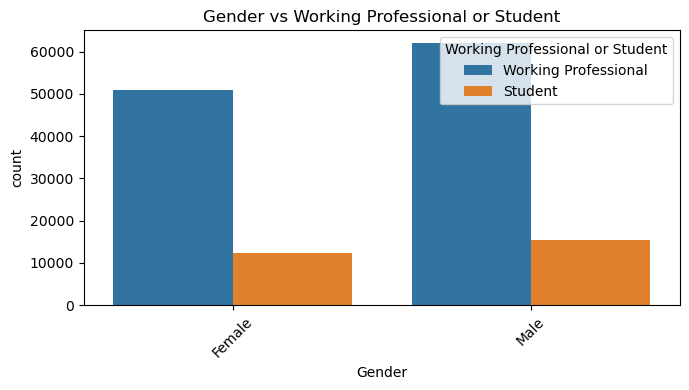

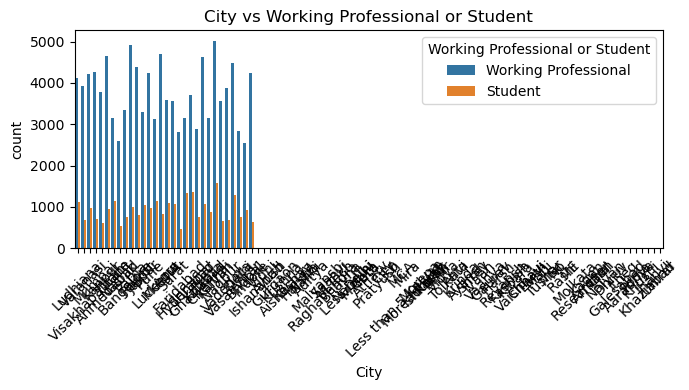

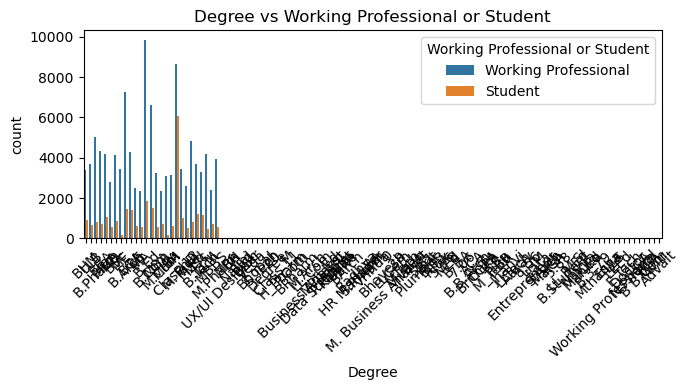

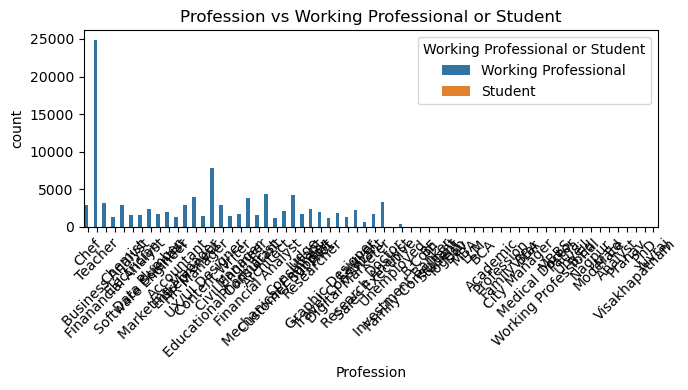

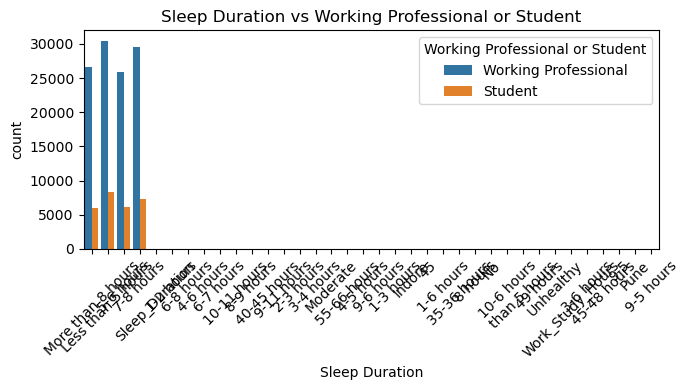

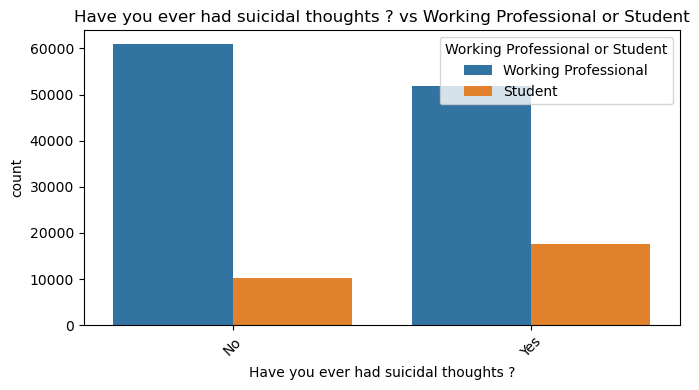

In [23]:
# --- Visualisasi Distribusi Kategorikal ---
for col in categorical_columns:
    plt.figure(figsize=(7,4))
    sns.countplot(data=traindata, x=col, hue='Working Professional or Student')
    plt.title(f'{col} vs Working Professional or Student')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Dari visualisasi di atas, bisa kita lihat: 

- Berdasarkan grafik distribusi **Gender**, jumlah laki-laki dan perempuan cukup seimbang untuk kategori *Working Professional*. Namun, untuk kategori *Student*, laki-laki sedikit lebih banyak dibanding perempuan. Ini menunjukkan bahwa kedua gender berpartisipasi aktif dalam kegiatan pendidikan dan pekerjaan, namun terdapat sedikit dominasi laki-laki pada kelompok pelajar.

- Pada grafik **City**, terlihat jelas bahwa jumlah *Working Professional* mendominasi hampir di semua kota. Kota-kota besar seperti Bangalore, Pune, dan Mumbai memiliki jumlah profesional yang jauh lebih tinggi dibandingkan mahasiswa. Sementara itu, mahasiswa tersebar secara merata namun dalam jumlah yang jauh lebih sedikit.

- Visualisasi dari **Degree** menunjukkan bahwa mahasiswa (*Student*) mendominasi pada gelar-gelar populer seperti B.Tech, B.Sc, dan B.Com. Sedangkan *Working Professional* memiliki distribusi yang lebih luas termasuk gelar lanjutan seperti MBA dan M.Tech. Ini menunjukkan bahwa jenis gelar berkaitan erat dengan status pekerjaan atau pendidikan.

- Grafik **Profession** memperlihatkan bahwa *Working Professional* mendominasi jumlah responden, khususnya pada profesi seperti Software Engineer, Data Analyst, dan Business Analyst. Sebaliknya, sangat sedikit mahasiswa yang tercatat dalam grafik ini, menandakan bahwa sebagian besar dari mereka belum masuk ke dunia kerja atau belum memiliki profesi tetap.

- Berdasarkan grafik **Sleep Duration**, sebagian besar responden memiliki waktu tidur di kisaran 6–8 jam per hari, baik untuk *Student* maupun *Working Professional*. Namun, jumlah *Working Professional* tetap lebih tinggi dalam semua kategori waktu tidur.

- Pada grafik **Have you ever had suicidal thoughts?**, terlihat bahwa untuk kedua kategori jawaban (Yes dan No), jumlah *Working Professional* lebih tinggi. Namun, proporsi mahasiswa (*Student*) yang menjawab "Yes" cukup signifikan, menandakan bahwa isu kesehatan mental perlu lebih diperhatikan di kalangan pelajar.